## Z-Spread 

Author: Will Carpenter

April 2024

A comprehensive Python notebook to create a spot interest rate curve and calculate bond Z-spreads, among other pricing metrics. This notebook leverages custom Python modules (see importing and project folder for all source code).

Data is currently based on Treasury Par Yield Rates from 10/19/2022 through 3/8/2024. This can be updated at anytime using the data publically available online. 

In [1]:
# Import
import pandas as pd
import numpy as np
# Custom modules
import mortgage_cash_flow as mbs
import bond_price as px
import spot_rate_bootstrap as boot 
import z_spread as pricing
import charts as chrts

#### Obtain U.S. Treasury Par-Yield Data

In [2]:
# Importing data available on Github  
tsy      = pd.read_csv("https://raw.githubusercontent.com/wrcarpenter/Z-Spread/main/Data/daily-treasury-rates.csv", header=0)
head     = pd.read_csv("https://raw.githubusercontent.com/wrcarpenter/Z-Spread/main/Data/daily-treasury-spot-header.csv")
tsy_cols = list(tsy.columns.values)
cols     = list(head.columns.values)

#### Interpolate Semi-Annual Par Yield Rates

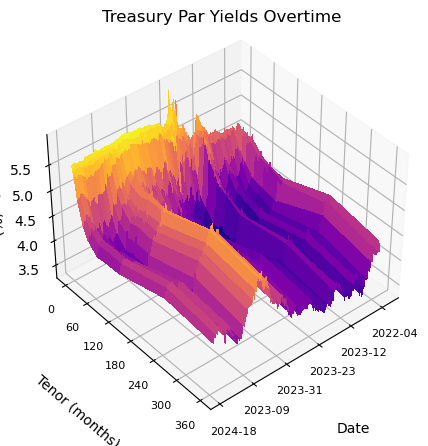

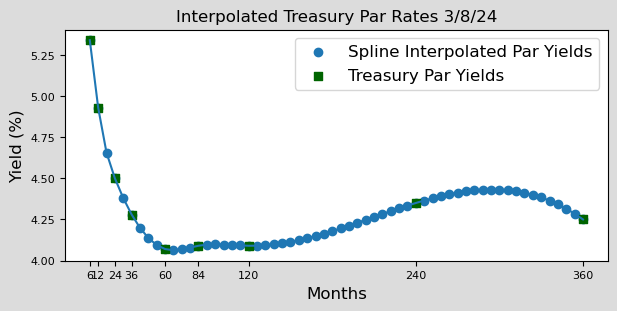

In [3]:
# Semi-annual interpolation 
ylds = boot.interpolate_yields(tsy, head)
# 3D visualization of yields
chrts.tsy_rate_surface(tsy, 40, 50, 5,7)
chrts.interp_tsy_yld_plot(ylds, tsy_cols, 7, 3)

#### Boostrap Treasury Yield Data to Create Spot Rate Curve

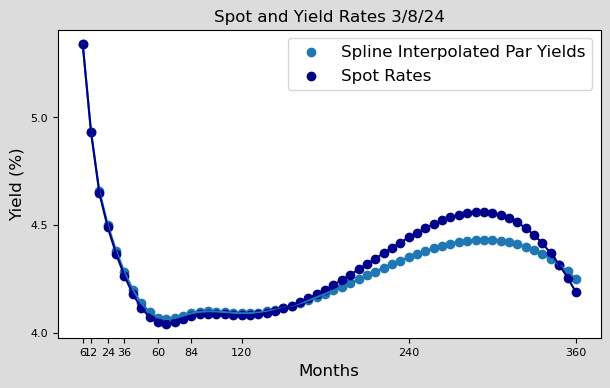

In [4]:
# Run module
spots         = boot.spot_rate_bootstrap(ylds, tsy, head)
spots_monthly = boot.spot_rates_monthly(spots)
# Charting
chrts.spot_rate_curve(ylds, tsy_cols, spots, 7, 4)

#### Generate Mortgage Cashflows

The cash flow engine module can be utilized to create a few examples below. Note that higher coupon cashflows are also assigned faster prepayment rates. When calculating WAL ('weighted average life') for each CF, it can be seen somewhat clearly that CFs with faster prepayment rates have shorter WALs.

In [10]:
# Define cashflows with various coupons and prepayment speeds
cf_1 = mbs.cash_flow('03/29/2024', 9.50, 360, 360, 360, 0, 54, 30, 'CPR', 1000000)
cf_2 = mbs.cash_flow('03/29/2024', 6.50, 360, 360, 360, 0, 54, 15, 'CPR', 1000000)
cf_3 = mbs.cash_flow('03/29/2024', 3.50, 360, 360, 360, 0, 54, 10, 'CPR', 1000000)
cf_4 = mbs.cash_flow('03/29/2024', 1.50, 360, 360, 360, 0, 54,  2, 'CPR', 1000000)
# Printing outputs for WAL
print("Cash Flow 1 WAL:", mbs.wal('3/29/2024', cf_1))
print("Cash Flow 2 WAL:", mbs.wal('3/29/2024', cf_2))
print("Cash Flow 3 WAL:", mbs.wal('3/29/2024', cf_3))
print("Cash Flow 4 WAL:", mbs.wal('3/29/2024', cf_4))


Cash Flow 1 WAL: 2.7753208659560076
Cash Flow 2 WAL: 5.544288478205802
Cash Flow 3 WAL: 7.294066119551972
Cash Flow 4 WAL: 13.25106447360233


#### Visualize Mortgage Cash Flows

Charting out the various mortgage cashflows created:


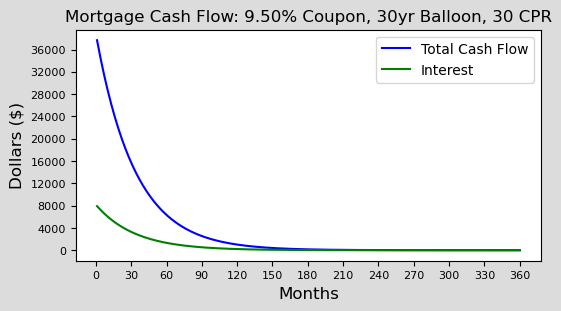

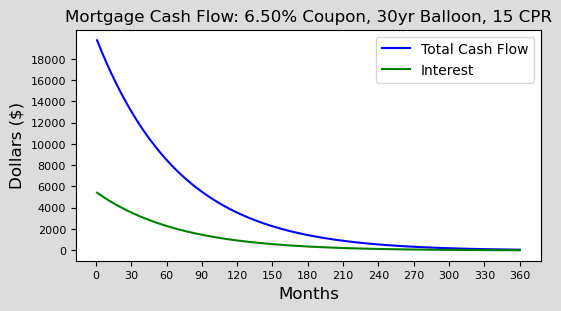

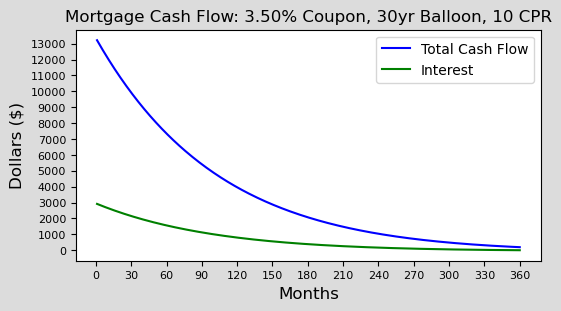

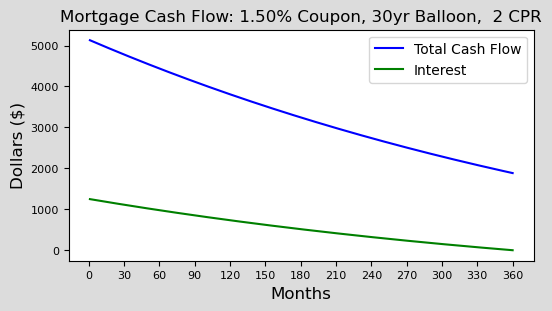

In [13]:
chrts.cash_flow_plot(cf_1, 6, 3, "Mortgage Cash Flow: 9.50% Coupon, 30yr Balloon, 30 CPR")
chrts.cash_flow_plot(cf_2, 6, 3, "Mortgage Cash Flow: 6.50% Coupon, 30yr Balloon, 15 CPR")
chrts.cash_flow_plot(cf_3, 6, 3, "Mortgage Cash Flow: 3.50% Coupon, 30yr Balloon, 10 CPR")
chrts.cash_flow_plot(cf_4, 6, 3, "Mortgage Cash Flow: 1.50% Coupon, 30yr Balloon,  2 CPR")

#### Calculating Bond Prices given a Spread

Assume that I and Z Spread for pricing are both 100 bps (basis points) and the pricing date is March 8th, 2024.

In [20]:
# Get data from github repo
ylds  = pd.read_csv("https://raw.githubusercontent.com/wrcarpenter/Z-Spread/main/Data/ylds-semi-annual.csv")
spots = pd.read_csv("https://raw.githubusercontent.com/wrcarpenter/Z-Spread/main/Data/spots-monthly.csv")

# I-curve
i_curve = ylds.loc[ylds['Date']=='3/8/2024']
i_curve = i_curve.drop("Date", axis=1)    
# Z-curve
z_curve = spots.loc[spots['Date']=='3/8/2024']
z_curve = z_curve.drop("Date", axis=1)
    
# Prices given I-Spread of 100 bps
px_cf_1_i =  pricing.price(cf_1, i_curve, "03/29/2024", 100, "I")
px_cf_2_i =  pricing.price(cf_2, i_curve, "03/29/2024", 100, "I")
px_cf_3_i =  pricing.price(cf_3, i_curve, "03/29/2024", 100, "I")
px_cf_4_i =  pricing.price(cf_4, i_curve, "03/29/2024", 100, "I")

# Prices given Z-Spread of 100 bps
px_cf_1_z  =  pricing.price(cf_1, z_curve, "03/29/2024", 100, "Z")
px_cf_2_z  =  pricing.price(cf_2, z_curve, "03/29/2024", 100, "Z")
px_cf_3_z  =  pricing.price(cf_3, z_curve, "03/29/2024", 100, "Z")
px_cf_4_z  =  pricing.price(cf_4, z_curve, "03/29/2024", 100, "Z")

# Output that reports price in tick format given a I-Spread
print("Cash Flow 1 price given I-Spread of 100 bps: ", px.tick(px_cf_1_i))
print("Cash Flow 2 price given I-Spread of 100 bps: ", px.tick(px_cf_2_i))
print("Cash Flow 3 price given I-Spread of 100 bps: ", px.tick(px_cf_3_i))
print("Cash Flow 4 price given I-Spread of 100 bps: ", px.tick(px_cf_4_i))

print('')
print('')

# Output that reports price in tick format given a Z-Spread
print("Cash Flow 1 price given Z-Spread of 100 bps: ", px.tick(px_cf_1_z))
print("Cash Flow 2 price given Z-Spread of 100 bps: ", px.tick(px_cf_2_z))
print("Cash Flow 3 price given Z-Spread of 100 bps: ", px.tick(px_cf_3_z))
print("Cash Flow 4 price given Z-Spread of 100 bps: ", px.tick(px_cf_4_z))



Cash Flow 1 price given I-Spread of 100 bps:  109-213
Cash Flow 2 price given I-Spread of 100 bps:  106-03+
Cash Flow 3 price given I-Spread of 100 bps:  91-125
Cash Flow 4 price given I-Spread of 100 bps:  68-236


Cash Flow 1 price given Z-Spread of 100 bps:  109-182
Cash Flow 2 price given Z-Spread of 100 bps:  105-072
Cash Flow 3 price given Z-Spread of 100 bps:  90-171
Cash Flow 4 price given Z-Spread of 100 bps:  67-176


#### Calcuating Bond Spread given a Price

In [25]:

# Solve for various Z-Spreads given difference prices
sprd_1_cf_1 = pricing.spread(cf_1, z_curve, '03/29/2024', px.untick(110-00), 'Z')
sprd_2_cf_1 = pricing.spread(cf_1, z_curve, '03/29/2024', px.untick(108-00), 'Z')
sprd_3_cf_1 = pricing.spread(cf_1, z_curve, '03/29/2024', px.untick(105-00), 'Z')
sprd_4_cf_1 = pricing.spread(cf_1, z_curve, '03/29/2024', px.untick(102-00), 'Z')
sprd_5_cf_1 = pricing.spread(cf_1, z_curve, '03/29/2024', px.untick(100-00), 'Z')

print("Cash Flow 1 Z-Spread for a 110-00 dollar price:", round(sprd_1_cf_1, 1))
print("Cash Flow 1 Z-Spread for a 108-00 dollar price:", round(sprd_2_cf_1, 1))
print("Cash Flow 1 Z-Spread for a 105-00 dollar price:", round(sprd_3_cf_1, 1))
print("Cash Flow 1 Z-Spread for a 102-00 dollar price:", round(sprd_4_cf_1, 1))
print("Cash Flow 1 Z-Spread for a 100-00 dollar price:", round(sprd_5_cf_1, 1))




Cash Flow 1 Z-Spread for a 110-00 dollar price: 84.1
Cash Flow 1 Z-Spread for a 108-00 dollar price: 159.4
Cash Flow 1 Z-Spread for a 105-00 dollar price: 277.8
Cash Flow 1 Z-Spread for a 102-00 dollar price: 403.1
Cash Flow 1 Z-Spread for a 100-00 dollar price: 490.8
